In [5]:
# Importing the libraries
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("retail_dataset.csv")
data.head()

,0,1,2,3,4,5,6
0,Bread,Wine,Eggs,Meat,Cheese,Pencil,Diaper
1,Bread,Cheese,Meat,Diaper,Wine,Milk,Pencil
2,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
3,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
4,Meat,Pencil,Wine,NaN,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       315 non-null    object
 1   1       285 non-null    object
 2   2       245 non-null    object
 3   3       187 non-null    object
 4   4       133 non-null    object
 5   5       71 non-null     object
 6   6       41 non-null     object
dtypes: object(7)
memory usage: 17.4+ KB


In [4]:
data.isnull().sum()

0      0
1     30
2     70
3    128
4    182
5    244
6    274
dtype: int64

In [7]:
print(data.shape[1])

7


In [9]:
types = data.dtypes
print(types)

0    object
1    object
2    object
3    object
4    object
5    object
6    object
dtype: object


In [10]:
#Count total number of classes in Data
items = (data['0'].unique())
items

array(['Bread', 'Cheese', 'Meat', 'Eggs', 'Wine', 'Bagel', 'Pencil',
       'Diaper', 'Milk'], dtype=object)

In [12]:
#Create list 
transactions = []
for i in range(0, data.shape[0]):
    transactions.append([str(data.values[i,j]) for j in range(0, 7)])

transactions
print(i)

314


In [21]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
te_ary

array([[False,  True,  True, ...,  True,  True, False],
       [False,  True,  True, ...,  True,  True, False],
       [False, False,  True, ..., False,  True,  True],
       ...,
       [False,  True,  True, ...,  True,  True, False],
       [False, False,  True, ..., False, False,  True],
       [ True,  True, False, ..., False,  True,  True]])

In [22]:
df = pd.DataFrame(te_ary, columns=te.columns_)
print(df)

     Bagel  Bread  Cheese  Diaper   Eggs   Meat   Milk  Pencil   Wine    nan
0    False   True    True    True   True   True  False    True   True  False
1    False   True    True    True  False   True   True    True   True  False
2    False  False    True   False   True   True   True   False   True   True
3    False  False    True   False   True   True   True   False   True   True
4    False  False   False   False  False   True  False    True   True   True
..     ...    ...     ...     ...    ...    ...    ...     ...    ...    ...
310  False   True    True   False   True  False  False   False  False   True
311  False  False   False   False  False   True   True    True  False   True
312  False   True    True    True   True   True  False    True   True  False
313  False  False    True   False  False   True  False   False  False   True
314   True   True   False   False   True   True  False   False   True   True

[315 rows x 10 columns]


In [16]:
df=df[['Bagel','Bread','Cheese','Diaper','Eggs','Meat','Milk','Pencil','Wine']]

In [23]:
# df.drop(axis = 1)



,Bagel,Bread,Cheese,Diaper,Eggs,Meat,Milk,Pencil,Wine,nan
0,False,True,True,True,True,True,False,True,True,False
1,False,True,True,True,False,True,True,True,True,False
2,False,False,True,False,True,True,True,False,True,True
3,False,False,True,False,True,True,True,False,True,True
4,False,False,False,False,False,True,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...
310,False,True,True,False,True,False,False,False,False,True
311,False,False,False,False,False,True,True,True,False,True
312,False,True,True,True,True,True,False,True,True,False
313,False,False,True,False,False,True,False,False,False,True


In [19]:
print(df)

     Bagel  Bread  Cheese  Diaper   Eggs   Meat   Milk  Pencil   Wine
0    False   True    True    True   True   True  False    True   True
1    False   True    True    True  False   True   True    True   True
2    False  False    True   False   True   True   True   False   True
3    False  False    True   False   True   True   True   False   True
4    False  False   False   False  False   True  False    True   True
..     ...    ...     ...     ...    ...    ...    ...     ...    ...
310  False   True    True   False   True  False  False   False  False
311  False  False   False   False  False   True   True    True  False
312  False   True    True    True   True   True  False    True   True
313  False  False    True   False  False   True  False   False  False
314   True   True   False   False   True   True  False   False   True

[315 rows x 9 columns]


In [20]:
# print(df)
freq_items = apriori(df, min_support=0.2, use_colnames=True)
freq_items

,support,itemsets
0,0.425397,(Bagel)
1,0.504762,(Bread)
2,0.501587,(Cheese)
3,0.406349,(Diaper)
4,0.438095,(Eggs)
5,0.476190,(Meat)
6,0.501587,(Milk)
7,0.361905,(Pencil)
8,0.438095,(Wine)
9,0.279365,"(Bread, Bagel)"


In [24]:
#support, confidence, list
rules = association_rules(freq_items, metric="confidence", min_threshold=0.6)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Bagel),(Bread),0.425397,0.504762,0.279365,0.656716,1.301042,0.064641,1.442650,0.402687
1,(Eggs),(Cheese),0.438095,0.501587,0.298413,0.681159,1.358008,0.078670,1.563203,0.469167
2,(Meat),(Cheese),0.476190,0.501587,0.323810,0.680000,1.355696,0.084958,1.557540,0.500891
3,(Cheese),(Meat),0.501587,0.476190,0.323810,0.645570,1.355696,0.084958,1.477891,0.526414
4,(Milk),(Cheese),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148,0.350053
5,(Cheese),(Milk),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148,0.350053
6,(Wine),(Cheese),0.438095,0.501587,0.269841,0.615942,1.227986,0.050098,1.297754,0.330409
7,(Eggs),(Meat),0.438095,0.476190,0.266667,0.608696,1.278261,0.058050,1.338624,0.387409
8,"(Meat, Cheese)",(Eggs),0.323810,0.438095,0.215873,0.666667,1.521739,0.074014,1.685714,0.507042
9,"(Meat, Eggs)",(Cheese),0.266667,0.501587,0.215873,0.809524,1.613924,0.082116,2.616667,0.518717


In [25]:
list(rules)

['antecedents',
 'consequents',
 'antecedent support',
 'consequent support',
 'support',
 'confidence',
 'lift',
 'leverage',
 'conviction',
 'zhangs_metric']

In [26]:
print(len(rules))

14


In [27]:
freq_items['length'] = freq_items['itemsets'].apply(lambda x: len(x))
freq_items

,support,itemsets,length
0,0.425397,(Bagel),1
1,0.504762,(Bread),1
2,0.501587,(Cheese),1
3,0.406349,(Diaper),1
4,0.438095,(Eggs),1
5,0.476190,(Meat),1
6,0.501587,(Milk),1
7,0.361905,(Pencil),1
8,0.438095,(Wine),1
9,0.279365,"(Bread, Bagel)",2


In [28]:
freq_items[ (freq_items['length'] == 2) &
                   (freq_items['support'] >= 0.3) ]

,support,itemsets,length
19,0.323810,"(Meat, Cheese)",2
20,0.304762,"(Milk, Cheese)",2


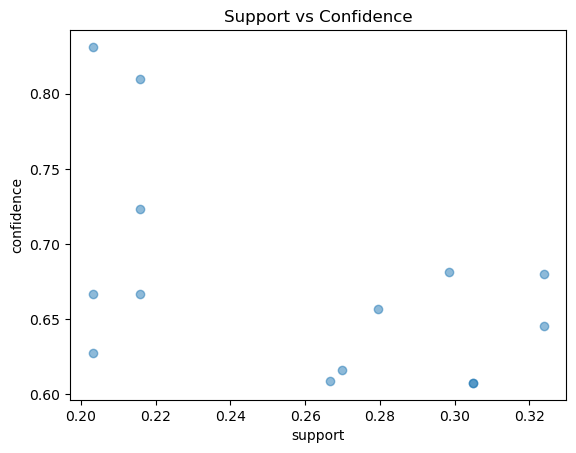

In [29]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

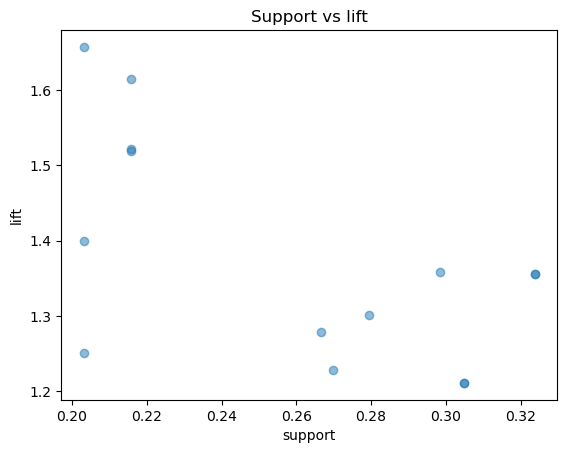

In [30]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs lift')
plt.show()

In [31]:
import pickle
filename = "model9.sav"
pickle.dump(te_ary, open(filename, "wb"))